In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#设置中文编码和负号的正常显示
plt.rcParams['font.family']='Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
filepath = r'C:\Users\Ring\Documents\Xindolia_Ring\Code\DataVisualization\Seaborn'
#filepath = '/home/mw/input/data1329'
tips = sns.load_dataset("tips", cache=True, data_home=filepath)
fmri = sns.load_dataset("fmri", cache=True, data_home=filepath)
exercise = sns.load_dataset("exercise", cache=True, data_home=filepath)
titanic =  sns.load_dataset("titanic", cache=True, data_home=filepath)

1. 绘制多个分类的散点图

In [4]:
# 1. 利用pandas构建时间序列数据，从2000-1-31开始，以月为频率，生成100条时间序列；
index = pd.date_range(start="2000-1-31", periods=100,freq="m", name="date")
pd.DataFrame(index).head()

,date
0,2000-01-31
1,2000-02-29
2,2000-03-31
3,2000-04-30
4,2000-05-31


In [7]:
# 2. 生成4列100个服从高斯分布的随机数，并按列求累计和（cumsum函数）；
data = np.random.randn(100, 4).cumsum(axis=0)

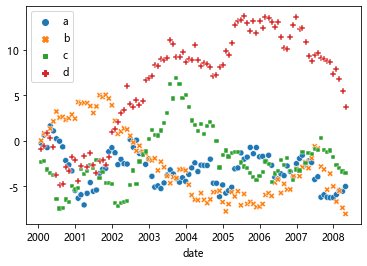

In [8]:
# 3. 合并所有列，并设置列名为a,b,c,d，生成散点图；
Figdf = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.scatterplot(data=Figdf)
plt.show()

2. 绘制2010年人口年龄结构金字塔

In [7]:
# 1. 读取文件：people.csv
df = pd.read_csv(r'Seaborn/people.csv')
df.head()

,Unnamed: 0,地区,类别,统计人数,年龄段,性别
0,0,全国,合计,1332810869,合计,合计
1,1,全国,男_合计,682329104,合计,男
2,2,全国,女_合计,650481765,合计,女
3,3,全国,小计_0岁,13786434,0岁,小计
4,4,全国,男_0岁,7461199,0岁,男


In [9]:
# 2. 筛选数据：地区:全国；性别：男和女；年龄段：不等于合计；
sex = ['男','女']
df = df[(df.地区=='全国') & (df.性别.isin(sex)) & (df.年龄段 != '合计')]
df.head()
df.loc[:,~df.columns.str.contains('Unnamed')].reset_index(drop=True).head()
#删除'Unnamed'列，并reset_index

,地区,类别,统计人数,年龄段,性别
0,全国,男_0岁,7461199,0岁,男
1,全国,女_0岁,6325235,0岁,女
2,全国,男_1-4岁,33601367,1-4岁,男
3,全国,女_1-4岁,28144809,1-4岁,女
4,全国,男_5-9岁,38464665,5-9岁,男


In [10]:
# 3. 添加一列：人口占比 = 每行的统计人数/总统计人数 * 100，并保留两位有效数字；
df['人口占比'] = round((df['统计人数'] / df['统计人数'].sum())*100,2)
df.head()

,Unnamed: 0,地区,类别,统计人数,年龄段,性别,人口占比
4,4,全国,男_0岁,7461199,0岁,男,0.56
5,5,全国,女_0岁,6325235,0岁,女,0.47
7,7,全国,男_1-4岁,33601367,1-4岁,男,2.52
8,8,全国,女_1-4岁,28144809,1-4岁,女,2.11
10,10,全国,男_5-9岁,38464665,5-9岁,男,2.89


<AxesSubplot:xlabel='人口占比', ylabel='年龄段'>

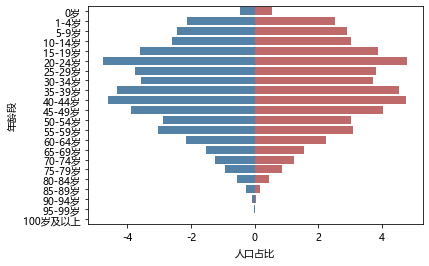

In [12]:
# 4. 绘制人口年龄结构金字塔（女左男右）
mpeople = df[df['性别'] == '男']
sns.barplot(x='人口占比', y='年龄段', color='indianred', data=mpeople)
wpeople = df[df['性别'] == '女']
wpeople['人口占比'] = 0 - wpeople['人口占比']
sns.barplot(y='年龄段', x='人口占比', color = 'steelblue', data=wpeople)

3. 绘制各年龄段男VS女占比差异线图

In [14]:
# 1. 构建所需数据框：各年龄段，男占比，女占比；
people = df.loc[:,~df.columns.str.contains('Unnamed')].reset_index(drop=True)

data_mf = {'M':df[df['性别']=='男']['人口占比'].values,
           'F':df[df['性别']=='女']['人口占比'].values,
           'index':df['年龄段'].unique()}
Comdata = pd.DataFrame(data_mf)

In [15]:
# 2. 占比差异即为：男占比-女占比；
Comdata.loc[:,'data_mf_diff'] = Comdata.M - Comdata.F
Comdata.head()

,M,F,index,data_mf_diff
0,0.56,0.47,0岁,0.09
1,2.52,2.11,1-4岁,0.41
2,2.89,2.43,5-9岁,0.46
3,3.02,2.60,10-14岁,0.42
4,3.89,3.60,15-19岁,0.29


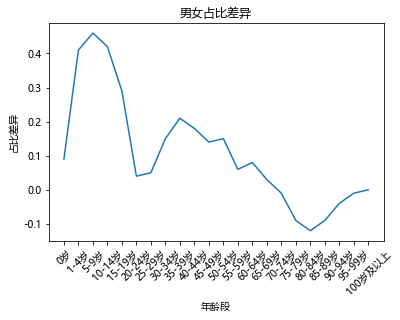

In [16]:
# 3. 横轴：各年龄段；纵轴：占比差异；绘制线图
sns.lineplot(x='index', y='data_mf_diff', data=Comdata)
plt.xlabel('年龄段')
plt.xticks(rotation=45)
plt.ylabel('占比差异')
plt.title('男女占比差异')
plt.show()